In [1]:
import os
import operator
import numpy as np
from typing import List
from gensim.models import KeyedVectors, Word2Vec
from gensim.test.utils import datapath
import matplotlib.pyplot as plt
from compute_accuracy import compute_accuracy

In [2]:
wv = KeyedVectors.load_word2vec_format('word2vec-cc100-cbow-d100-w3-min10-epochs500.vectors', binary=False)

In [3]:
wv.similarity('шчанюк', 'сабака')

0.7598403

In [4]:
compute_accuracy(lambda w1, w2: wv.similarity(w1, w2))

Failed ['вуліца', 'дом', 'парк', 'плошча', 'праспект', 'сквер', 'завулак', 'бульвар'] / вёска
Failed ['галава', 'рука', 'нага', 'тулава', 'шыя', 'палец', 'спіна', 'плячо'] / шапка
Failed ['яблык', 'банан', 'апельсін', 'персік', 'груша', 'сліва', 'мандарын', 'ківі'] / морква
Failed ['ласось', 'карп', 'шчупак', 'акунь', 'вугор', 'плотка', 'сом', 'стронга'] / рака
Failed ['ласось', 'карп', 'шчупак', 'акунь', 'вугор', 'плотка', 'сом', 'стронга'] / кіт
Failed ['ласось', 'карп', 'шчупак', 'акунь', 'вугор', 'плотка', 'сом', 'стронга'] / плаўнік
Failed ['ласось', 'карп', 'шчупак', 'акунь', 'вугор', 'плотка', 'сом', 'стронга'] / дно
Failed ['ласось', 'карп', 'шчупак', 'акунь', 'вугор', 'плотка', 'сом', 'стронга'] / васьміног
Failed ['ласось', 'карп', 'шчупак', 'акунь', 'вугор', 'плотка', 'сом', 'стронга'] / човен
Failed ['планета', 'зорка', 'камета', 'астэроід', 'галактыка', 'метэарыт', 'квазар', 'туманнасць'] / марс
Failed ['таракан', 'клешч', 'муха', 'вош', 'клоп', 'блыха', 'камар', 'авадзень

0.8505747126436781

In [5]:
model = Word2Vec.load("word2vec-cc100-cbow-d100-w3-min10-epochs500.model")

Let's check whether we have correlation between frequency of a word and its average similarity to another word.

In [6]:
vocab_size = len(model.wv.index_to_key)
pairs = [(np.random.randint(vocab_size), np.random.randint(vocab_size)) for _ in range(1000)]
similarities = [model.wv.similarity(model.wv.index_to_key[p[0]], model.wv.index_to_key[p[1]]) for p in pairs]

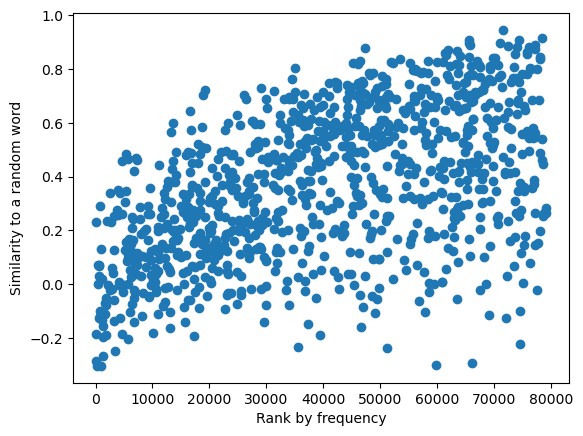

In [7]:
plt.scatter([p[0] for p in pairs], similarities)
plt.xlabel('Rank by frequency')
plt.ylabel('Similarity to a random word')
plt.show()

Checking most similar words for a rare word:

In [8]:
model.wv.get_vecattr("пітон","count")

289

In [10]:
closest_words = []
for word, similarity in model.wv.most_similar('пітон', topn=5000):
    closest_words.append((word, similarity, model.wv.get_vecattr(word,"count"))) 

for word, similarity, count in closest_words[:20]:
    print(word.ljust(10) + "\t" + "%.2f" % similarity, count)

вожыкаў   	0.89 259
бегемот   	0.88 259
хвастаты  	0.88 182
звярок    	0.86 944
яшчарка   	0.86 803
хамяк     	0.85 358
кобра     	0.85 189
андатра   	0.85 121
гадзюка   	0.85 525
тхор      	0.85 260
гіена     	0.84 237
сумчаты   	0.84 133
антылопа  	0.83 266
рапуха    	0.83 202
норка     	0.83 619
вывадак   	0.83 234
жаба      	0.83 2777
палёўка   	0.83 122
жывародны 	0.83 63
усяедны   	0.83 67


It seems rare words are very close to other rare words. Let's find whether some frequent words are close too.

In [11]:
frequent_words = [i for i in range(len(closest_words)) if closest_words[i][2] > 800]
frequent_words

[3,
 4,
 16,
 21,
 26,
 30,
 31,
 40,
 41,
 48,
 67,
 92,
 101,
 112,
 133,
 155,
 159,
 160,
 164,
 167,
 173,
 203,
 218,
 222,
 226,
 241,
 255,
 264,
 281,
 289,
 294,
 302,
 310,
 336,
 338,
 389,
 397,
 410,
 424,
 431,
 438,
 455,
 478,
 494,
 503,
 512,
 535,
 546,
 568,
 573,
 601,
 643,
 647,
 654,
 685,
 687,
 688,
 711,
 761,
 763,
 777,
 784,
 811,
 821,
 826,
 894,
 899,
 908,
 936,
 954,
 983,
 1000,
 1043,
 1103,
 1106,
 1119,
 1139,
 1171,
 1196,
 1207,
 1240,
 1291,
 1324,
 1338,
 1384,
 1392,
 1408,
 1411,
 1420,
 1451,
 1474,
 1482,
 1573,
 1582,
 1665,
 1667,
 1703,
 1710,
 1846,
 1896,
 1901,
 2034,
 2052,
 2074,
 2082,
 2168,
 2203,
 2249,
 2277,
 2292,
 2338,
 2382,
 2397,
 2402,
 2416,
 2453,
 2487,
 2494,
 2499,
 2502,
 2556,
 2603,
 2612,
 2637,
 2684,
 2694,
 2791,
 2800,
 2821,
 2833,
 2848,
 2879,
 3050,
 3092,
 3163,
 3179,
 3208,
 3220,
 3282,
 3307,
 3361,
 3386,
 3449,
 3628,
 3692,
 3934,
 3994,
 4139,
 4182,
 4363,
 4379,
 4434,
 4752,
 4772,
 4781,


In [12]:
for ind in frequent_words:
    word, similarity, count = closest_words[ind]
    print(word.ljust(10) + "\t" + "%.2f" % similarity, count)

звярок    	0.86 944
яшчарка   	0.86 803
жаба      	0.83 2777
папугай   	0.82 1002
змяя      	0.82 1732
качка     	0.82 2810
кошка     	0.82 2641
котка     	0.81 3129
слон      	0.81 2047
малпа     	0.80 2678
лісіца    	0.80 1188
вуж       	0.79 814
сабачка   	0.79 1501
кацяня    	0.78 1502
дыназаўр  	0.77 1641
пінгвін   	0.77 1457
драпежны  	0.77 1576
муха      	0.77 2928
кракадзіл 	0.77 1153
шчанюк    	0.76 1266
слімак    	0.76 823
драпежнік 	0.76 2201
коцік     	0.75 1309
тыгр      	0.75 1691
змей      	0.75 3535
вавёрка   	0.75 1904
кураня    	0.75 844
жывёліна  	0.74 3077
поні      	0.74 904
чарапаха  	0.74 1849
рысь      	0.74 1300
зграя     	0.74 1481
гусь      	0.74 2721
камар     	0.73 1404
кот       	0.73 7447
шкура     	0.72 1321
мамант    	0.72 979
алень     	0.72 3324
дзік      	0.72 2729
чарвяк    	0.72 2580
дзяцел    	0.72 980
грызун    	0.72 1217
мядзведзь 	0.71 8193
гном      	0.71 939
звер      	0.71 8617
верабей   	0.71 2512
эльф      	0.71 879
малюск    	0.71 880
пту

Doesn't make sense even for more frequent words. Let's check the structure of vectors

In [13]:
model.wv.get_vector('пітон')

array([-7.11083174e-01, -1.03271775e-01,  8.26705456e-01, -1.14689857e-01,
       -3.98876667e-01,  1.83447003e-01,  1.95379004e-01,  1.56593010e-01,
       -7.11546004e-01, -1.83307528e-01,  2.33279243e-01, -3.77596647e-01,
       -3.27986419e-01, -1.10166514e+00,  6.49968803e-01,  5.50045609e-01,
       -5.90567887e-01, -1.80087268e-01,  5.52218497e-01,  1.06895208e+00,
        9.90292013e-01, -1.90338925e-01,  7.04766996e-03, -9.50548112e-01,
        6.65810049e-01,  5.96991599e-01, -4.79775608e-01, -2.78570861e-01,
       -1.59844089e+00,  2.97316283e-01,  1.93199515e-01,  1.66287310e-02,
       -1.47835338e+00, -1.06605291e+00,  5.19090831e-01, -1.71089101e+00,
       -7.33425498e-01,  2.91887313e-01, -2.33815357e-01,  1.22087017e-01,
        2.63631083e-02, -1.11153233e+00,  5.69773428e-02,  1.39941216e-01,
        7.41566598e-01, -2.99496621e-01, -3.72056574e-01, -4.51138705e-01,
       -7.85113156e-01, -1.22294962e+00, -4.04398173e-01, -5.30427814e-01,
        1.13149083e+00, -

In [16]:
np.mean(np.abs(model.wv.get_vector('пітон')))

0.63200307

In [17]:
np.mean(np.abs(model.wv.get_vector('беларусь')))

5.348291

In [18]:
coord_abs_values = [np.mean(np.abs(model.wv.get_vector(word))) for word in model.wv.index_to_key]

Text(0, 0.5, 'Mean absolute coordinate value of embedding')

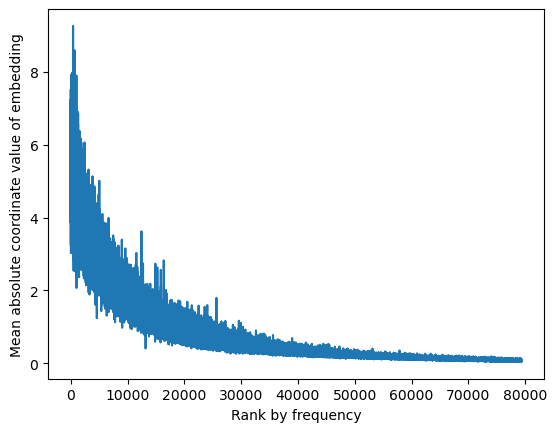

In [19]:
plt.plot(coord_abs_values)
plt.xlabel('Rank by frequency')
plt.ylabel('Mean absolute coordinate value of embedding')

Seems rare words have low absolute values for coordinates. This however doesn't explain the clustering of them from cosine similarity perspective.